In [33]:
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [34]:
abalone_data = pd.read_csv('quizData_SetB.csv')
abalone_data.head()

,Length,Height,Weight,Age
0,0.530,0.135,0.6770,Adult
1,0.530,0.150,0.7775,Adult
2,0.545,0.125,0.7680,Adult
3,0.550,0.150,0.8945,Adult
4,0.525,0.140,0.6065,Adult


In [35]:
abalone_data.describe()

,Length,Height,Weight
count,4000.000000,4000.000000,4000.000000
mean,0.521759,0.138874,0.819623
std,0.120595,0.042092,0.489400
min,0.075000,0.000000,0.002000
25%,0.450000,0.110000,0.433500
50%,0.540000,0.140000,0.787750
75%,0.615000,0.165000,1.144500
max,0.815000,1.130000,2.825500


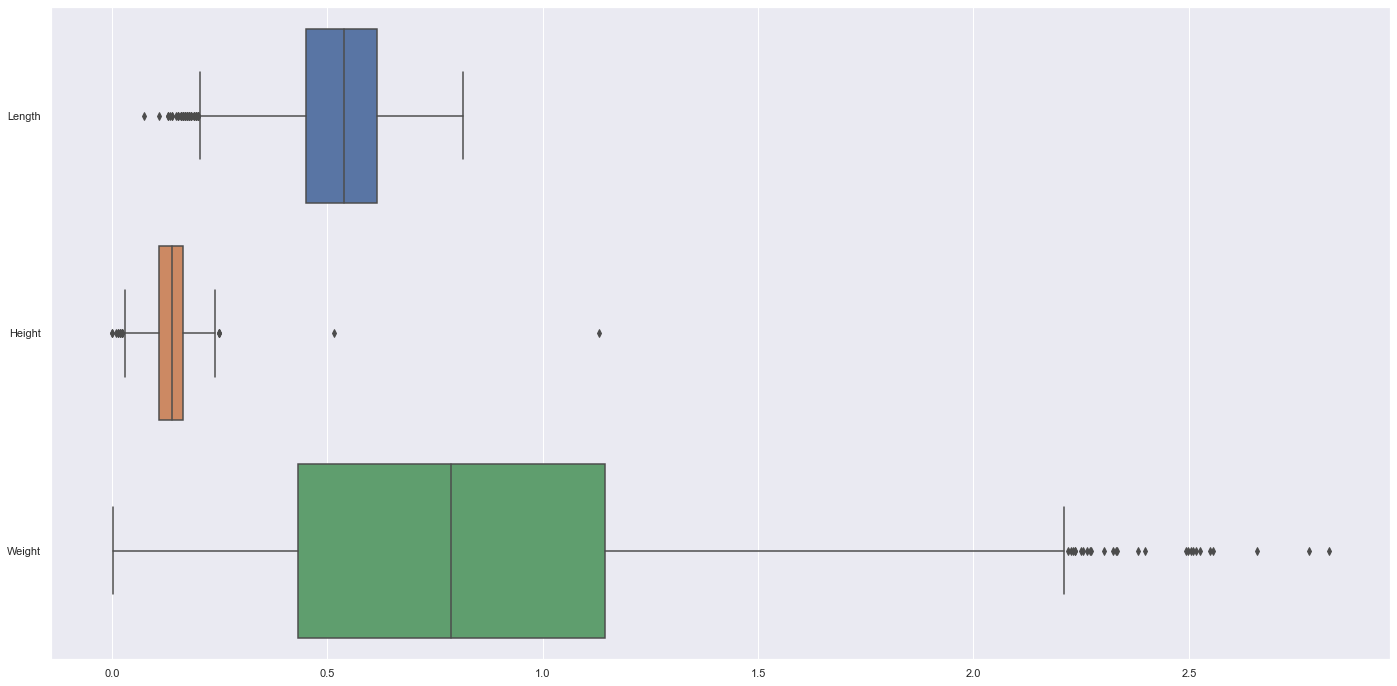

In [36]:
varDF = pd.DataFrame(abalone_data[["Length","Height","Weight"]])

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(data = varDF, orient = "h")

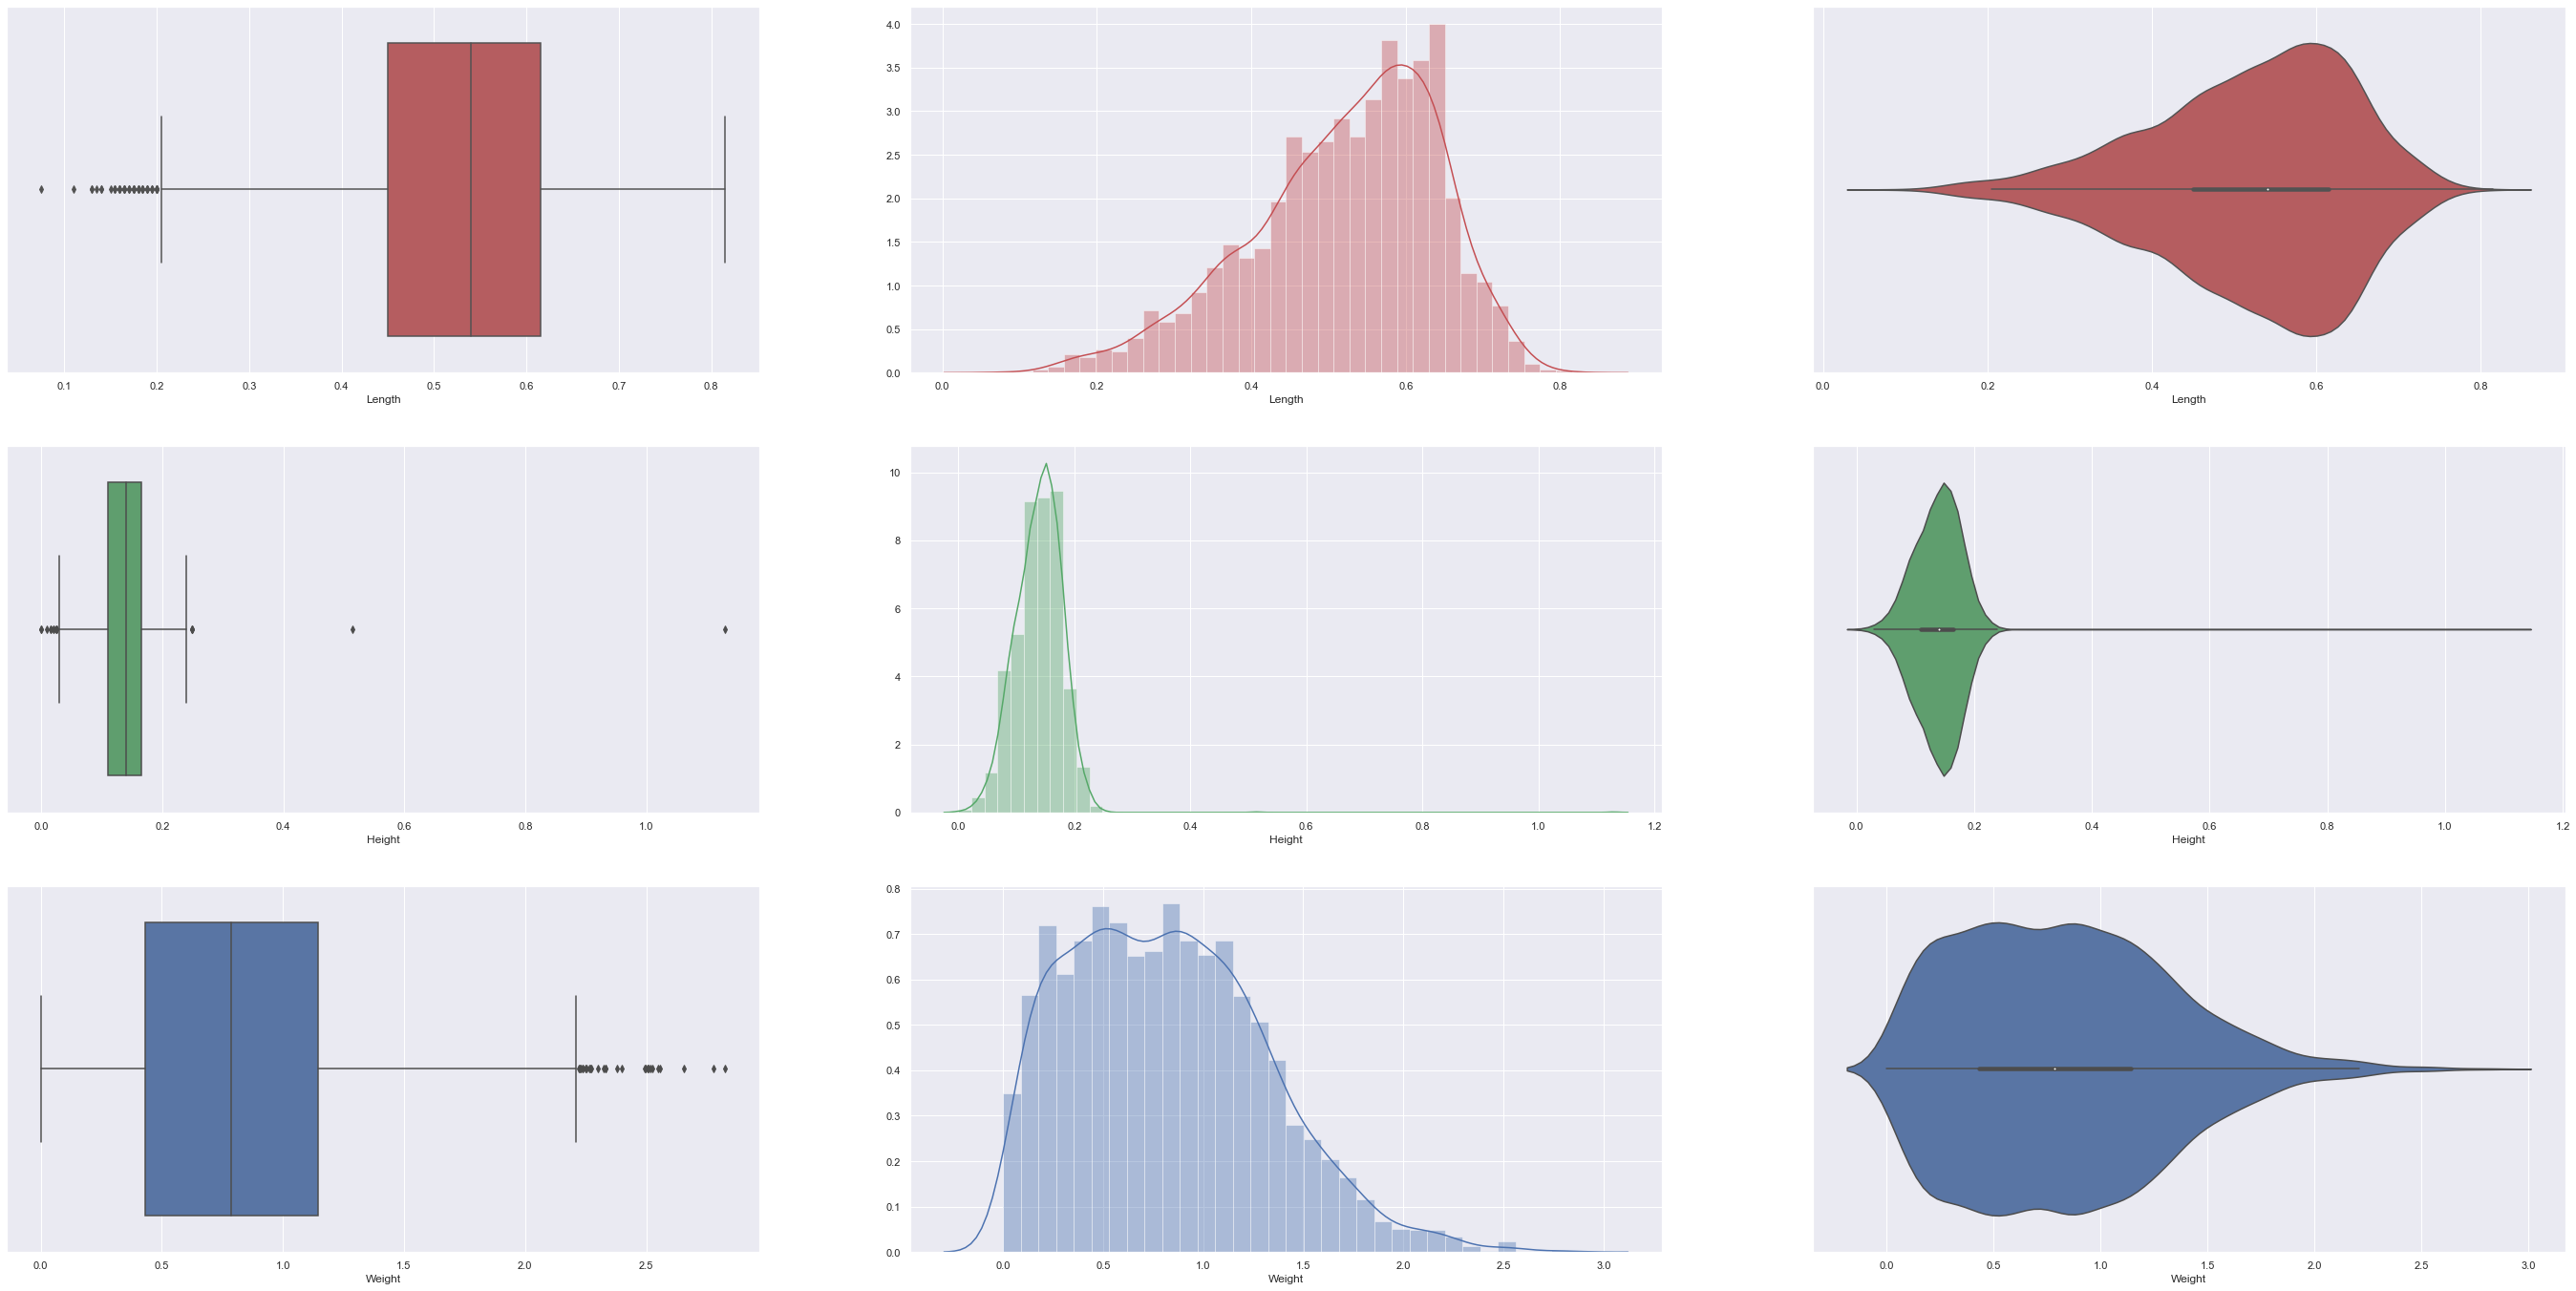

In [37]:
f, axes = plt.subplots(3, 3, figsize=(48, 24))
colors = ["r", "g", "b"]

count = 0
for var in varDF:
    sb.boxplot(varDF[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(varDF[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(varDF[var], color = colors[count], ax = axes[count,2])
    count += 1

In [38]:
age = pd.DataFrame(abalone_data["Age"])
age["Age"].value_counts()

Adult     2658
Infant    1342
Name: Age, dtype: int64

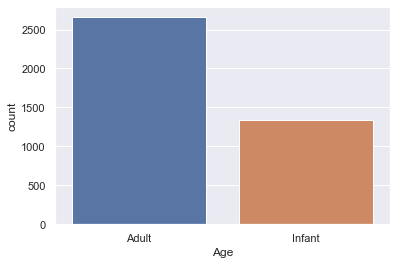

In [39]:
sb.countplot(age["Age"])

In [40]:
#The variable weight has the most number of outliers
#The ratio of "Adult:Infant" is: 2658/1342

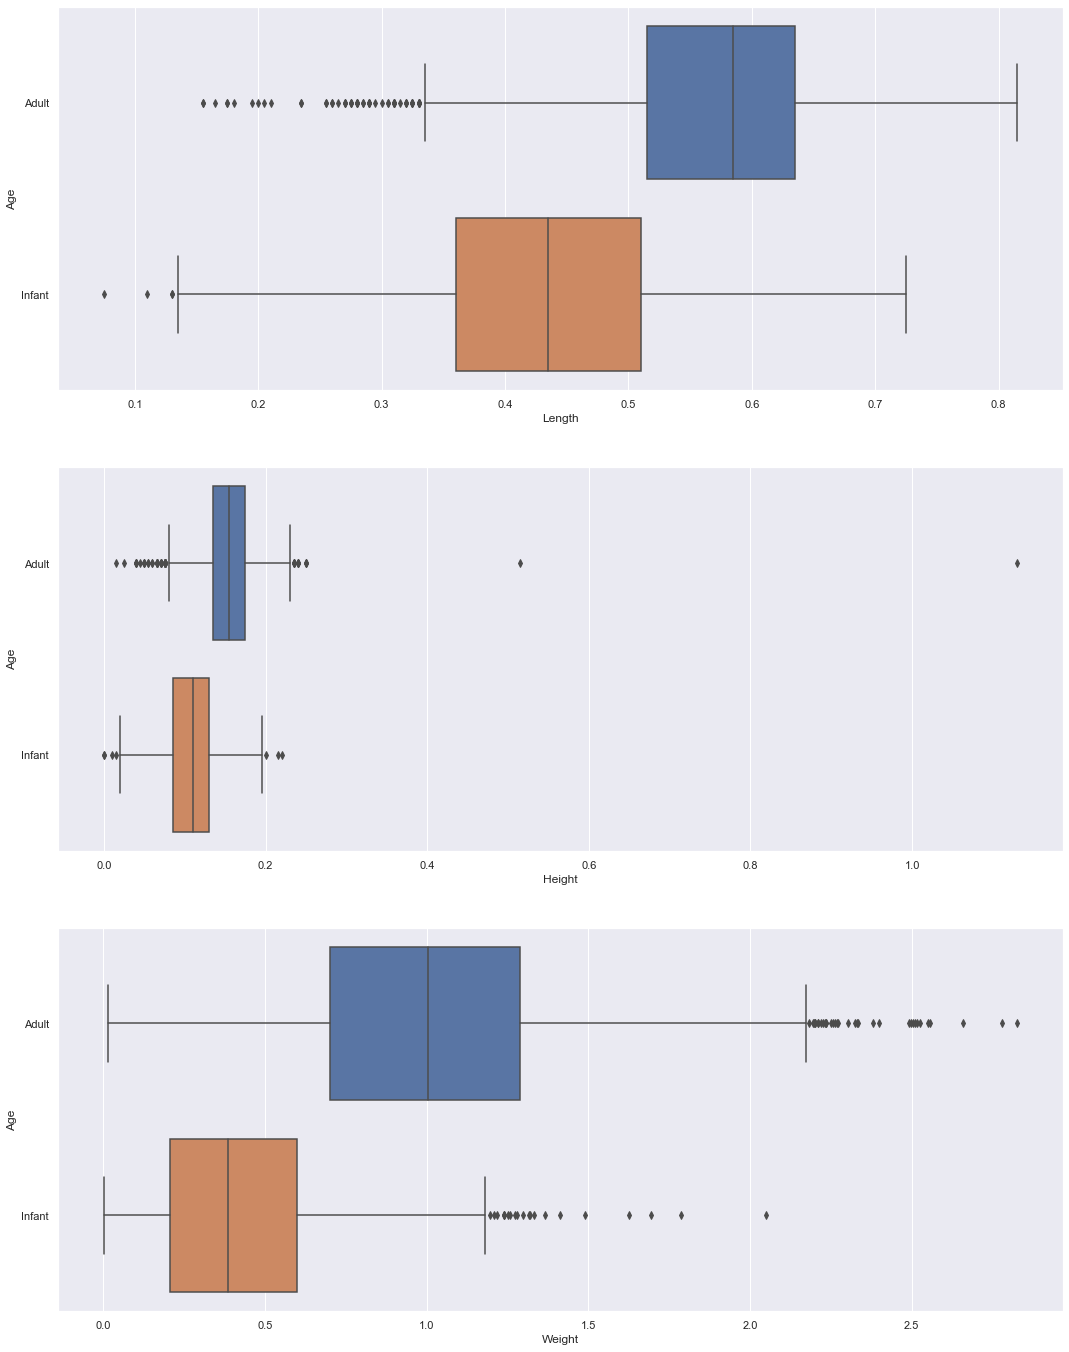

In [41]:
f, axes = plt.subplots(3, 1, figsize=(18, 24))

count = 0
for var in varDF:
    sb.boxplot(x = var, y = "Age", data = abalone_data, orient = "h", ax = axes[count])
    count += 1

In [42]:
#Weight is the most important in predicting age, since the data distribution overlaping between the adult and infant abalone is 
#relatively small acompare to the distribution of length and height

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7741666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.781875



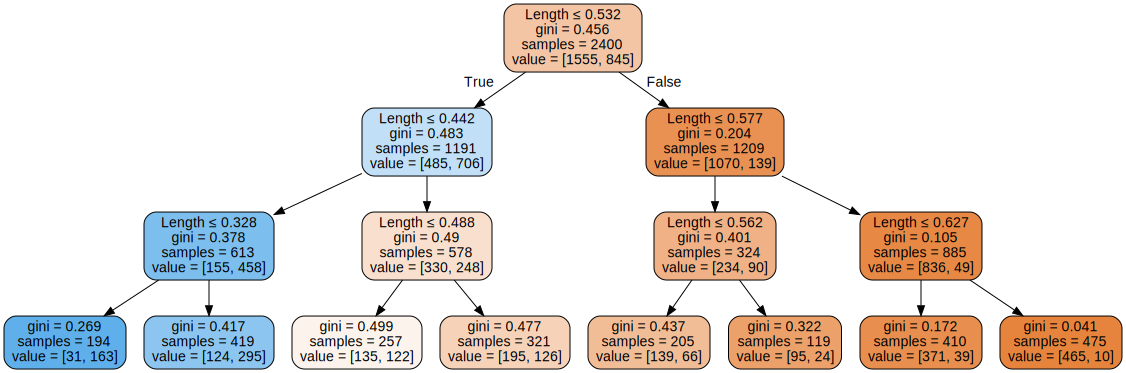

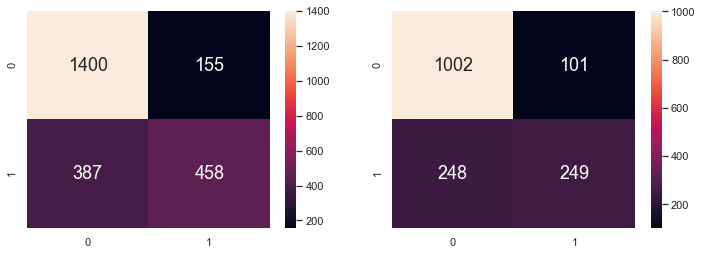

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

y = pd.DataFrame(abalone_data['Age'])
X = pd.DataFrame(abalone_data[["Length", "Height", "Weight"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

XL_train = pd.DataFrame(X_train['Length'])
XH_train = pd.DataFrame(X_train['Height'])
XW_train = pd.DataFrame(X_train['Weight'])

XL_test = pd.DataFrame(X_test['Length'])
XH_test = pd.DataFrame(X_test['Height'])
XW_test = pd.DataFrame(X_test['Weight'])

dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(XL_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(XL_train)
y_test_pred = dectree.predict(XL_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(XL_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(XL_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = XL_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

In [44]:
#Length decision tree above
#Height decision tree below

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6691666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6575



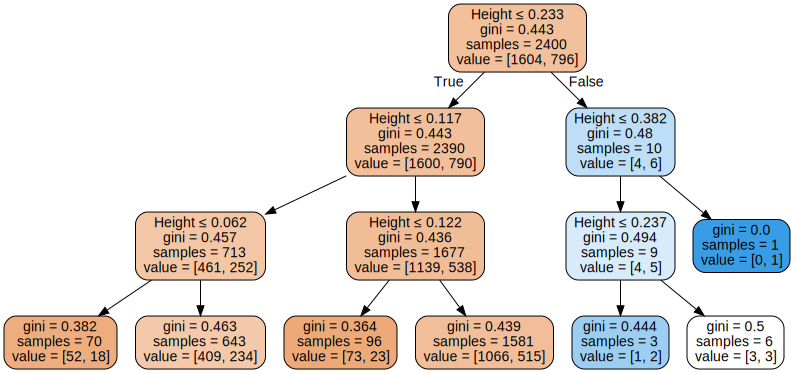

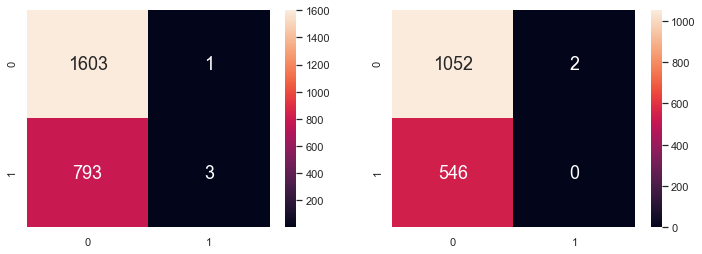

In [48]:
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(XH_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(XH_train)
y_test_pred = dectree.predict(XH_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(XH_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(XH_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = XH_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

In [49]:
#Weight decision tree below:

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6708333333333333

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.656875



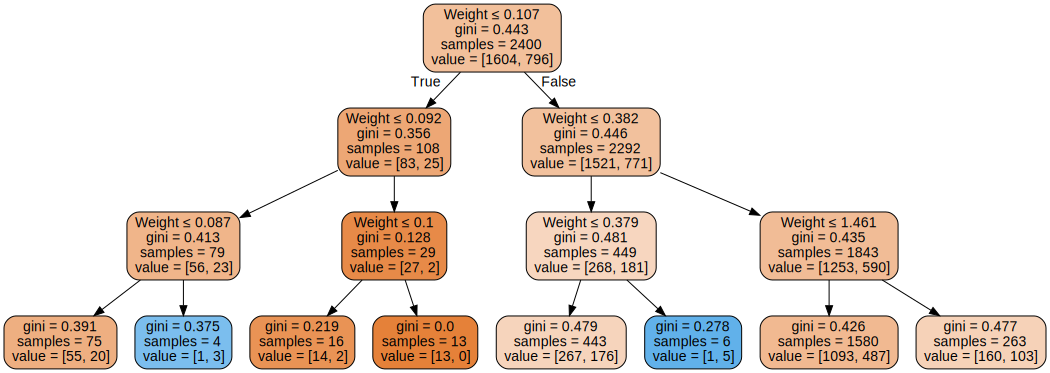

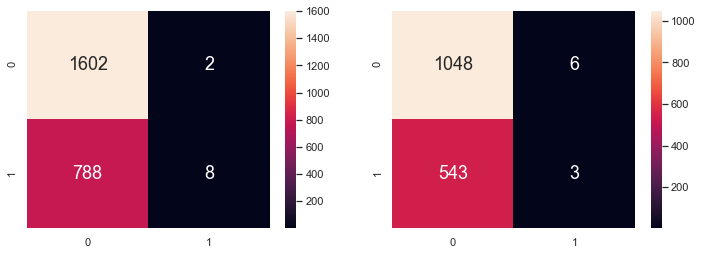

In [50]:
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(XW_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(XW_train)
y_test_pred = dectree.predict(XW_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(XW_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(XW_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = XW_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

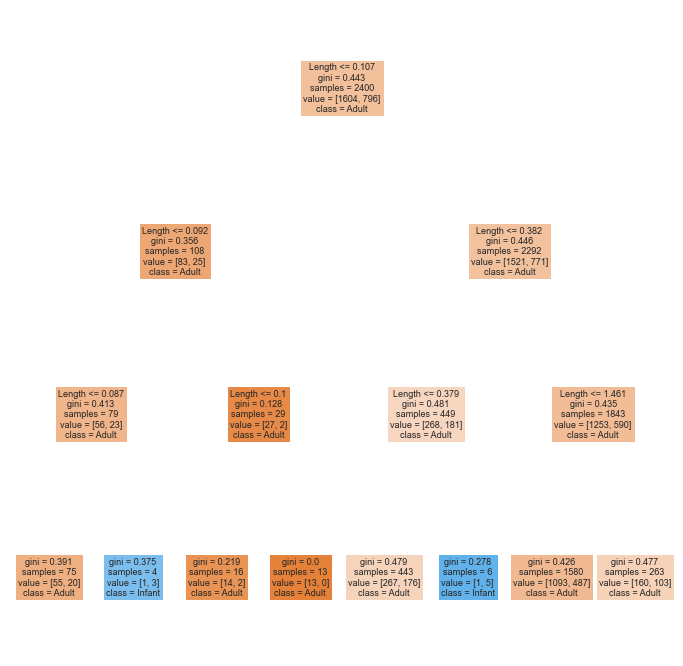

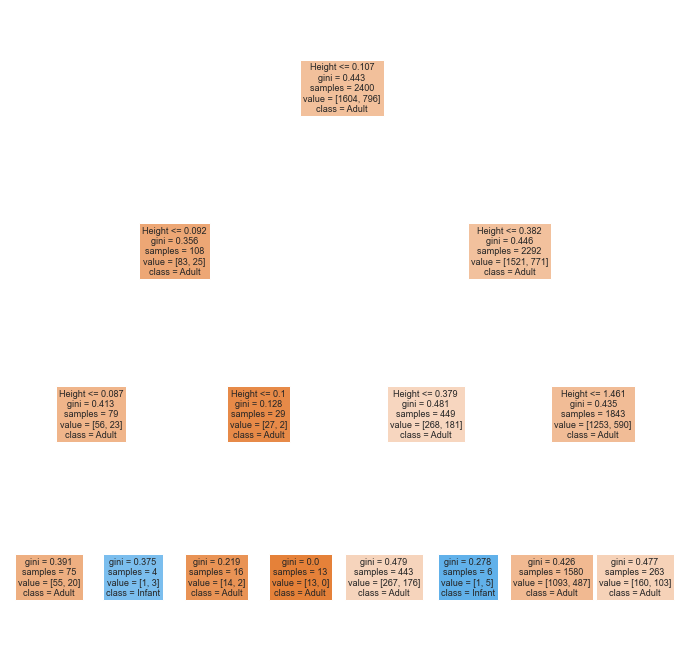

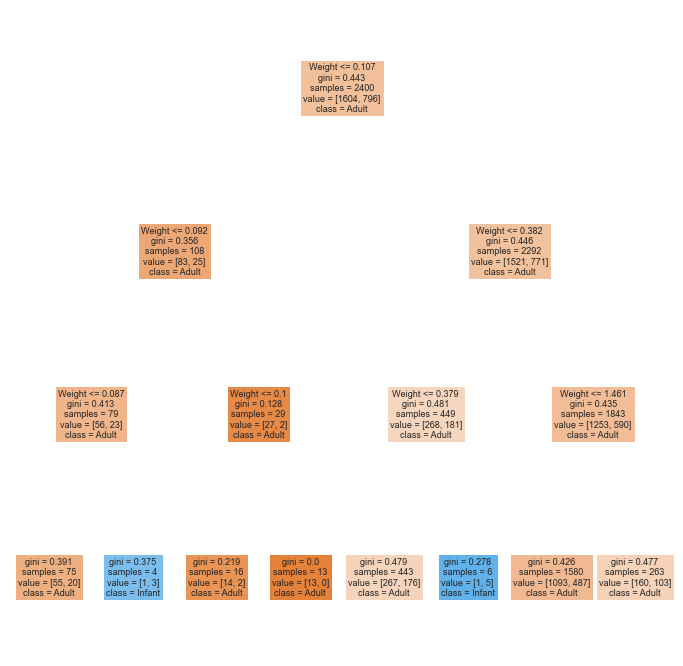

In [51]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(dectree, 
          feature_names = XL_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)
plt.show()

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(dectree, 
          feature_names = XH_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)
plt.show()

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(dectree, 
          feature_names = XW_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)
plt.show()

In [52]:
#since the classification accuracy is higher
#The weight decision tree us the best

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8041666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.79375



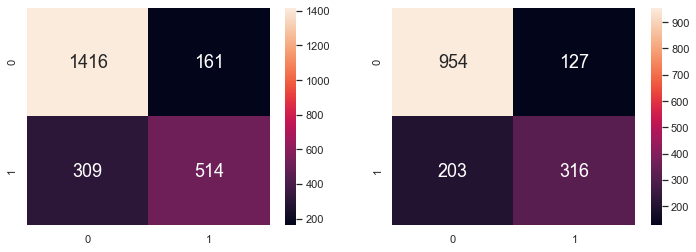

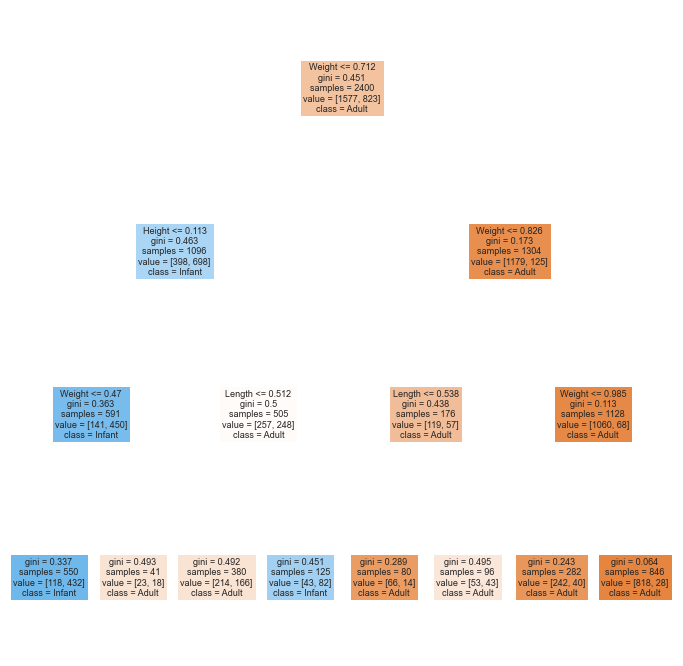

In [53]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
predictors = ["Length", "Height", "Weight"]

y = pd.DataFrame(abalone_data['Age'])
X = pd.DataFrame(abalone_data[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)
plt.show()

In [54]:
#max_depth = 20 below:

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9941666666666666

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.736875



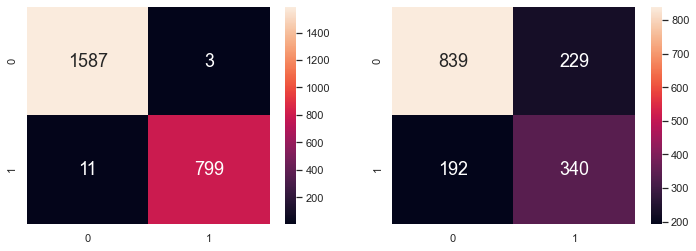

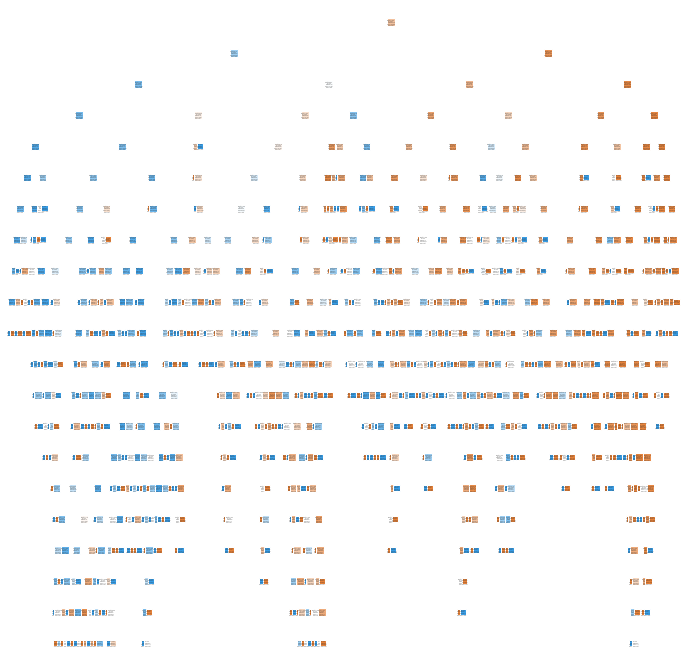

In [55]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
predictors = ["Length", "Height", "Weight"]

y = pd.DataFrame(abalone_data['Age'])
X = pd.DataFrame(abalone_data[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)
plt.show()

In [56]:
#When the maximum depth of the tree increases to 20, the classification accuracy of the Train data increases a lot 
#However the classification accuracy of the test dataet decreases a bit. Thus the model with max_depth of 20 is not  absolutely better.